In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Generate sample data
np.random.seed(42)
data = np.zeros(200)
spikes = np.random.choice([0, 20, 50, 100], size=10, replace=True)
data[np.random.choice(data.shape[0], 10, replace=False)] = spikes

# Convert to pandas Series
time_series = pd.Series(data)


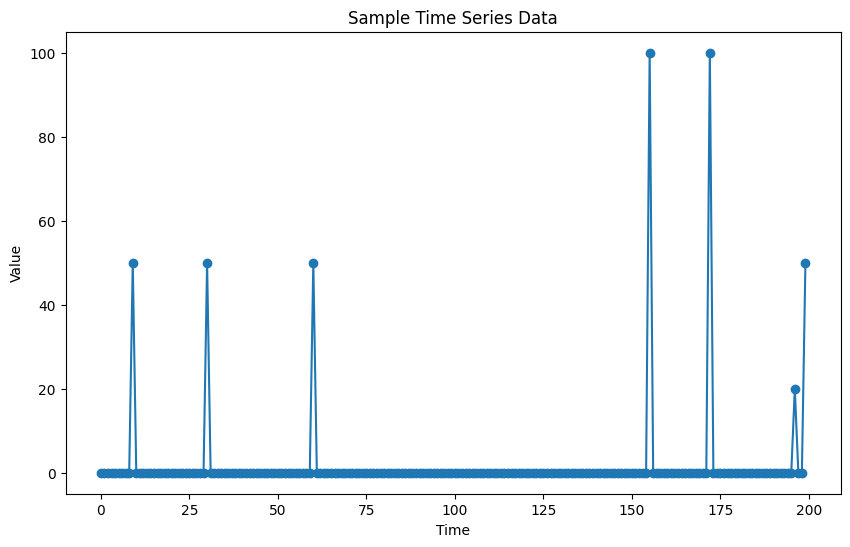

In [3]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_series, marker='o')
plt.title('Sample Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [4]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(time_series.values.reshape(-1, 1))

In [5]:
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data_normalized, seq_length)

In [6]:

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

Epoch 1/50
5/5 [==============================] - 2s 88ms/step - loss: 0.0038 - val_loss: 0.0617
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0623
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0616
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0614
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0619
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0619
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0616
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0037 - val_loss: 0.0616
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0617
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0618
Epoch 11/50
5/5 [=====================

In [10]:
# Predict on the test data
y_pred = model.predict(X_test)

# Inverse transform the predicted and actual values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

2/2 [==============================] - 0s 2ms/step


In [11]:
# Calculate the error
error = np.abs(y_test_inv - y_pred_inv)

In [12]:
# Define an anomaly threshold (e.g., mean error + 3*std error)
threshold = np.mean(error) + 3 * np.std(error)
anomalies = error > threshold

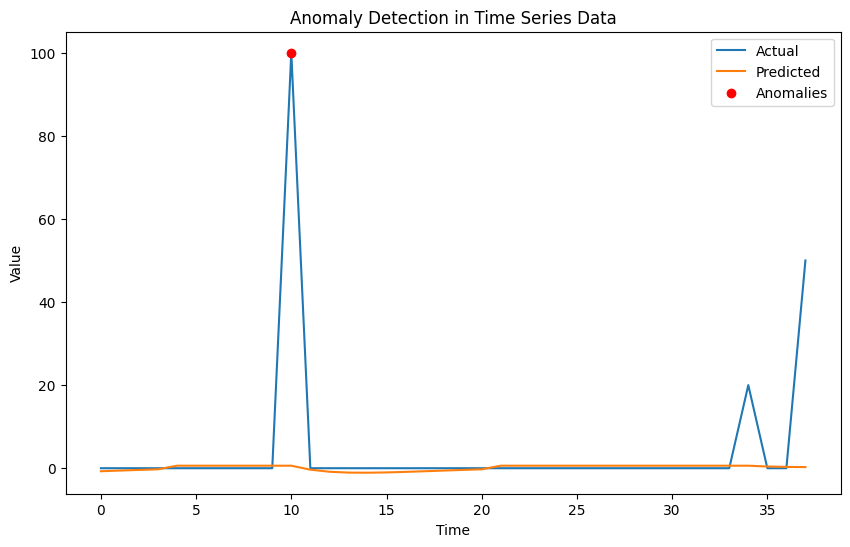

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.scatter(np.where(anomalies)[0], y_test_inv[anomalies], color='red', label='Anomalies', zorder=5)
plt.title('Anomaly Detection in Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



In [14]:
# Print the indices of detected anomalies
anomaly_indices = np.where(anomalies)[0]
print(f"Anomalies detected at indices: {anomaly_indices}")


Anomalies detected at indices: [10]
